# Lab | Cleaning numerical data

### The Data Analysis Process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting
- Instructions


#### 1. Import the necessary libraries.

In [3]:
import pandas as pd
import numpy as np

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [ ]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

#### 3. First look at its main features (head, shape, info). 
NOTE The target column is total_claim_amount

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe(include = 'all').T

#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [ ]:
new_column_names = [col.replace(' ', '_').lower() for col in data.columns]
data.columns = new_column_names


In [ ]:
data.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)
data

#### 5. Change effective to date column to datetime format.

In [ ]:
# Convert the 'Date_String' column to datetime format
data['effective_date'] = pd.to_datetime(data['effective_to_date'])
data

In [ ]:
# We drop the Customer, ID column, since all the values are unique
if 'customer' in data.columns:
    data.drop(columns=['customer'], inplace=True)

In [ ]:
if 'effective_to_date' in data.columns:
    data.drop(columns=['effective_to_date'], inplace=True)
data

#### 6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [ ]:
numerical_df = data.select_dtypes(np.number)
numerical_df.head()

In [ ]:
numerical_df.isnull().sum()/len(numerical_df)

In [ ]:
numerical_df.dtypes

In [ ]:
for col in numerical_df.columns:
    print(len(numerical_df[col].unique()))
display(numerical_df.shape[0] * 0.025)

In [ ]:
threshold = numerical_df.shape[0]*0.025

#### 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [ ]:
def split_continuous_discrete(df, threshold):
    
    discrete_columns = [col for col in df.columns if df[col].nunique() < threshold]
    continuous_columns = [col for col in df.columns if df[col].nunique() > threshold]

    return df[continuous_columns], df[discrete_columns]

In [ ]:
continuous_df, discrete_df = split_continuous_discrete(numerical_df, threshold)
continuous_df


In [ ]:
discrete_df

In [ ]:
# we don't want to do this yet!  X = continuous_df.drop(['total_claim_amount'], axis=1)

#### 3. Plot a correlation matrix, what can you see?

In [ ]:
correlations_matrix = continuous_df.corr()
correlations_matrix

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr_matrix = continuous_df.corr()  # default for continuous variables
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
discrete_df

In [ ]:
discrete_df['monthly_premium_auto'].value_counts(dropna = False)

In [ ]:
discrete_df['months_since_last_claim'].value_counts(dropna = False)

In [ ]:
discrete_df['months_since_policy_inception'].value_counts(dropna = False)

In [ ]:
discrete_df['number_of_open_complaints'].value_counts(dropna = False)

In [ ]:
discrete_df['number_of_policies'].value_counts(dropna = False)

#### 9. Create a function to plot every discrete variable. Do the same with the continuous variables 
(Be careful, as you may need to change the plot type to one better suited for continuous data!)

In [ ]:
def plot_discrete_variables(df, column_list):
    for col in column_list:
        sns.countplot(x=col, data=discrete_df)
        plt.xticks(rotation=10)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"Count of {col}")
        plt.show()
        
        
column_list = discrete_df.columns.tolist()

In [ ]:
plot_discrete_variables(discrete_df, column_list)

In [ ]:
def plot_continuous_df(df):
    for col in continuous_df.columns:
        sns.distplot(continuous_df[col], kde=True)
        plt.title(col)
        plt.show()

In [ ]:
plot_continuous_df(continuous_df)

#### 10. Comments on the plots

Income has been reported  at zero for 25% of the data. Therefore, fix zero income with the median income.

In [ ]:
continuous_df['income'].value_counts(dropna=False)

In [ ]:
continuous_df['income'].mean()

In [ ]:
continuous_df['income'].median()

In [ ]:
continuous_df['income'].mode()

In [ ]:
median_income = continuous_df['income'].median()
continuous_df['income'] = np.where(continuous_df['income'] == 0, median_income, continuous_df['income'])

In [ ]:
continuous_df['income'].hist(bins=10)  

#### 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [ ]:
def plot_continuous_boxplots(data_frame, continuous_columns):
    for col in continuous_df_columns:
        sns.boxplot(x=col, data=continuous_df)
        plt.xlabel(col)
        plt.ylabel("Value")
        plt.title(f"Box Plot of {col}")
        plt.show()
continuous_df_columns = ['income', 'total_claim_amount']


In [ ]:
plot_continuous_boxplots(continuous_df, continuous_df_columns)

#### 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [ ]:
# Yes, within clv, there is a lot of outlier activity, but will not remove since it is a key feature of interest

In [ ]:
data.shape
# ensured no change to the number of rows !

#### 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [ ]:
nan_check = data.isna().sum()
print(nan_check)

In [ ]:
nan_count= data.isnull().sum()
print(nan_count)

#### 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [ ]:
numerical_df.to_csv('numerical.csv', index=False)

# Done morning-lab

# Continue the afternoon-lab

# Lab | Cleaning categorical data

For this lab, we will be using the same notebook as in the previous lab.

## Data Analysis Process

### Remember the process:
- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting

1. Open the notebook created for Lab-cleaning-numerical-data.

In [5]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [19]:
new_column_names = [col.replace(' ', '_').lower() for col in data.columns]
data.columns = new_column_names


In [31]:
data.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)
data

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_date
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011-02-10
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011-02-12
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011-02-06
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011-02-03


In [50]:
data.dtypes


state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      float64
vehicle_class                           

In [32]:
# We drop the Customer, ID column, since all the values are unique
if 'customer' in data.columns:
    data.drop(columns=['customer'], inplace=True)

In [ ]:
-- Performed Date_time analysis here. 

In [54]:
data['effective_date'].min()

Timestamp('2011-01-01 00:00:00')

In [57]:
range = data['effective_date'].max() - data['effective_date'].min()
print('Tne range is:  ', range)

Tne range is:   58 days 00:00:00


In [64]:
# data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract day of the week, month, and calendar week
data['day_of_week'] = data['effective_date'].dt.day_name()
data['month_of_year'] = data['effective_date'].dt.month
data['calendar_week'] = data['effective_date'].dt.week
# data['year'] = data['effective_date'].dt.year

data['time'] = data['effective_date'].dt.time

data

/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_7908/1436847464.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['calendar_week'] = data['effective_date'].dt.week


,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,...,total_claim_amount,vehicle_class,vehicle_size,effective_date,day_of_week,month_of_year,calendar_week,time,year_extracted,year
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,384.811147,Two-Door Car,Medsize,2011-02-24,Thursday,2,8,00:00:00,2011,2011
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,1131.464935,Four-Door Car,Medsize,2011-01-31,Monday,1,5,00:00:00,2011,2011
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,566.472247,Two-Door Car,Medsize,2011-02-19,Saturday,2,7,00:00:00,2011,2011
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,529.881344,SUV,Medsize,2011-01-20,Thursday,1,3,00:00:00,2011,2011
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,138.130879,Four-Door Car,Medsize,2011-02-03,Thursday,2,5,00:00:00,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,198.234764,Four-Door Car,Medsize,2011-02-10,Thursday,2,6,00:00:00,2011,2011
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,379.200000,Four-Door Car,Medsize,2011-02-12,Saturday,2,6,00:00:00,2011,2011
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,790.784983,Four-Door Car,Medsize,2011-02-06,Sunday,2,5,00:00:00,2011,2011
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,691.200000,Four-Door Car,Large,2011-02-03,Thursday,2,5,00:00:00,2011,2011


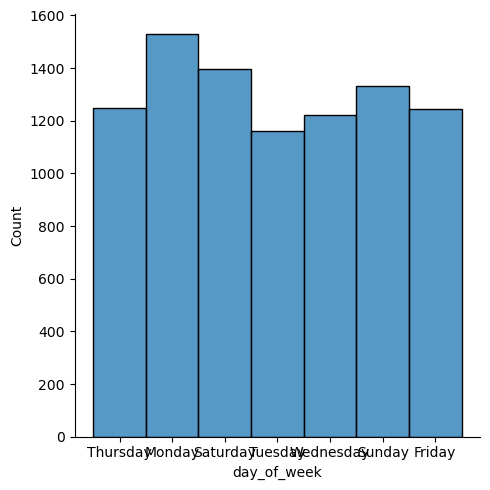

In [66]:
sns.displot(data["day_of_week"], bins=7)
plt.show()

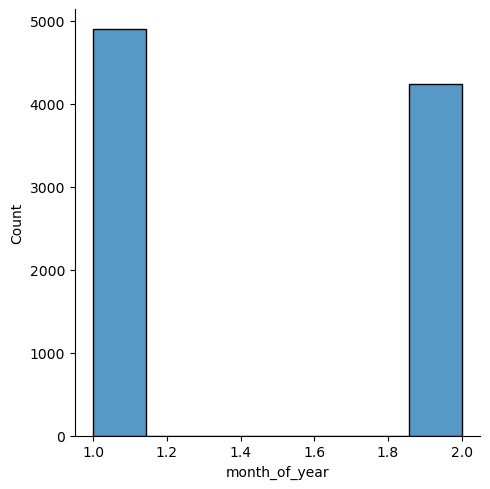

In [67]:
sns.displot(data["month_of_year"], bins=7)
plt.show()

In [68]:
data["month_of_year"].value_counts()

1    4898
2    4236
Name: month_of_year, dtype: int64

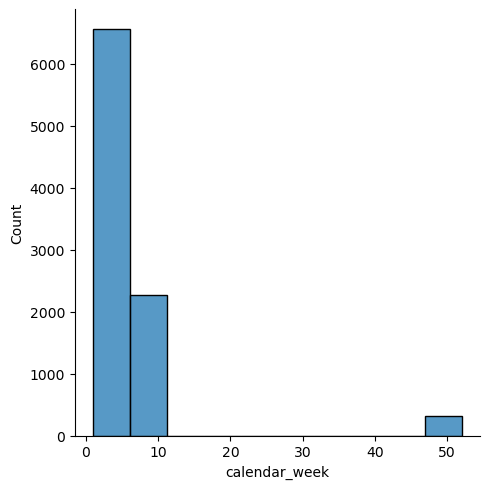

In [69]:
sns.displot(data["calendar_week"], bins=10)
plt.show()

#### 2. Find all of the categorical data. Save it in a categorical_df variable


In [52]:
categorical_df = data.select_dtypes(object, datetime)
categorical_df


NameError: name 'datetime' is not defined

#### 3. Check for NaN values and decide what to do with them, do it now.

In [27]:
categorical_df.isna().sum()
# no NaN values

state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

#### 4. Check all unique values of columns.

In [28]:
categorical_df.nunique()

state                5
response             2
coverage             3
education            5
employment_status    5
gender               2
location_code        3
marital_status       3
policy_type          3
policy               9
renew_offer_type     4
sales_channel        4
vehicle_class        6
vehicle_size         3
dtype: int64

In [12]:
# if 'effective_to_date' in categorical_df.columns:
#    categorical_df.drop(columns=['effective_to_date'], inplace=True)

In [34]:
def display_unique_values(df):
    for column in categorical_df.columns:
        unique_values = df[column].value_counts()
        print(f"Unique values in '{column}':\n{unique_values}")
        print('-----')
        
display_unique_values(categorical_df)

Unique values in 'state':
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
-----
Unique values in 'response':
No     7826
Yes    1308
Name: response, dtype: int64
-----
Unique values in 'coverage':
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
-----
Unique values in 'education':
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
-----
Unique values in 'employment_status':
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64
-----
Unique values in 'gender':
F    4658
M    4476
Name: gender, dtype: int64
-----
Unique values in 'location_code':
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
-----
Unique values in 'marital_status':
M

#### 5. Check dtypes. Do they all make sense as categorical data?

In [35]:
categorical_df.dtypes
# effective date (object) with all its 59 values is not giving us any value and may be removed

state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

### 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

Policy and policy types have some overlapping and alphanumerica data. Keep policy type but reduce to L1, L2, L3 in policy.

Same for Renew_offer_type which can be renamed to 1, 2, 3, 4




#### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

I have removed the customer index or number and the
effective_to_date. Both are not relelvant to predict total_claim_amount.

Education may be consolidated to High School, Undergraduate (consolidate Bachelor and College), and Postgraduate (Master and Doctor/PhD)

Location_code may be renamed to 0 for rural, 0.5 for suburban, and 1 for urban 

Vehicle class luxury may consolidate luxury SUV and Car

Vehicle_size may be renamed to 1 for small, 2, for medium and 3 for large

Finally, employment status may be consolidated.

#### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [36]:
categorical_df['policy'] = categorical_df['policy'].str.extract('(L[1-3])')
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [37]:
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('[^0-9]', '')
categorical_df


/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_7908/749321962.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('[^0-9]', '')


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,3,Branch,Four-Door Car,Large


#### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [38]:
# Vehicle class 

In [39]:
values_to_unify = ['Luxury SUV', 'Luxury Car', 'Sports Car']
unified_value = 'Luxury Cars'
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(values_to_unify), unified_value, categorical_df['vehicle_class'])
categorical_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Cars'],
      dtype=object)

In [40]:
# Education, employment status,  values can be consolidated

In [41]:
values_to_unify = ['Bachelor', 'College']
unified_value = 'Undergraduate'
categorical_df['education'] = np.where(categorical_df['education'].isin(values_to_unify), unified_value, categorical_df['education'])
categorical_df["education"].unique()

array(['Undergraduate', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [42]:
values_to_unify = ['Master', 'Doctor']
unified_value = 'Postgraduate'
categorical_df['education'] = np.where(categorical_df['education'].isin(values_to_unify), unified_value, categorical_df['education'])
categorical_df["education"].unique()

array(['Undergraduate', 'Postgraduate', 'High School or Below'],
      dtype=object)

In [43]:
values_to_unify = ['Medical Leave', 'Disabled', 'Retired', 'Unemployed']
unified_value = 'Unemployed'
categorical_df['employment_status'] = np.where(categorical_df['employment_status'].isin(values_to_unify), unified_value, categorical_df['employment_status'])
categorical_df["employment_status"].unique()

array(['Employed', 'Unemployed'], dtype=object)

In [44]:
location_mapping = {'Rural': 0, 'Suburban': 0.5, 'Urban': 1}

# Replace values in the 'Location_code' column using the mapping
categorical_df['location_code'] = categorical_df['location_code'].replace(location_mapping)

In [45]:
coverage_mapping = {'Basic': 0, 'Extended': 0.5, 'Premium': 1}

# Replace values in the 'Location_code' column using the mapping
categorical_df['coverage'] = categorical_df['coverage'].replace(coverage_mapping)

In [46]:
vehicle_size_mapping = {'Small': 0, 'Medsize': 0.5, 'Large': 1}

# Replace values in the 'Location_code' column using the mapping
categorical_df['vehicle_size'] = categorical_df['vehicle_size'].replace(vehicle_size_mapping)

In [47]:
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,Undergraduate,Employed,F,0.5,Married,Corporate Auto,L3,1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,Undergraduate,Unemployed,F,0.5,Single,Personal Auto,L3,3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,Undergraduate,Employed,F,0.5,Married,Personal Auto,L3,1,Agent,Two-Door Car,0.5
3,California,No,0.0,Undergraduate,Unemployed,M,0.5,Married,Corporate Auto,L2,1,Call Center,SUV,0.5
4,Washington,No,0.0,Undergraduate,Employed,M,0.0,Single,Personal Auto,L1,1,Agent,Four-Door Car,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0.0,Undergraduate,Employed,M,1.0,Married,Personal Auto,L1,2,Web,Four-Door Car,0.5
9130,California,Yes,0.5,Undergraduate,Employed,F,0.5,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,0.5
9131,California,No,0.5,Undergraduate,Unemployed,M,0.5,Single,Corporate Auto,L2,1,Branch,Four-Door Car,0.5
9132,California,No,0.5,Undergraduate,Employed,M,0.5,Married,Personal Auto,L2,3,Branch,Four-Door Car,1.0


In [48]:
def display_unique_values(df):
    for column in categorical_df.columns:
        unique_values = df[column].value_counts()
        print(f"Unique values in '{column}':\n{unique_values}")
        print('-----')
        
display_unique_values(categorical_df)

Unique values in 'state':
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
-----
Unique values in 'response':
No     7826
Yes    1308
Name: response, dtype: int64
-----
Unique values in 'coverage':
0.0    5568
0.5    2742
1.0     824
Name: coverage, dtype: int64
-----
Unique values in 'education':
Undergraduate           5429
High School or Below    2622
Postgraduate            1083
Name: education, dtype: int64
-----
Unique values in 'employment_status':
Employed      5698
Unemployed    3436
Name: employment_status, dtype: int64
-----
Unique values in 'gender':
F    4658
M    4476
Name: gender, dtype: int64
-----
Unique values in 'location_code':
0.5    5779
0.0    1773
1.0    1582
Name: location_code, dtype: int64
-----
Unique values in 'marital_status':
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
-----
Unique values in 'policy_type':
Personal Auto     6788
Corporate Auto

#### 10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [49]:
categorical_df.to_csv('categorical.csv', index=False)